[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Mura_All_Study_type.ipynb)

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

## Welcome to Colaboratory!

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [2]:
!wget https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip --no-check-certificate

--2018-08-21 05:10:24--  https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3380245855 (3.1G) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip       100%[===================>]   3.15G  14.4MB/s    in 3m 50s  

2018-08-21 05:14:15 (14.0 MB/s) - ‘MURA-v1.1.zip’ saved [3380245855/3380245855]



In [0]:
#!wget https://fs5.transfernow.net/download/5b73c4464b5cc/master/Image_Path.zip

In [0]:
#!unzip Image_Path

In [5]:
!ls

datalab  MURA-v1.1  MURA-v1.1.zip  sample_data


In [0]:
%%capture
!unzip MURA-v1.1.zip

In [0]:
#rm -r __MACOSX

In [7]:
!ls MURA-v1.1/

train		       train_labeled_studies.csv  valid_image_paths.csv
train_image_paths.csv  valid			  valid_labeled_studies.csv


In [0]:
!pip install xlrd

    100% |████████████████████████████████| 112kB 4.3MB/s 


In [0]:
import pandas as pd 
train_set = pd.read_csv('MURA-v1.1/train_image_paths.csv',header=None)
valid_set = pd.read_csv('MURA-v1.1/valid_image_paths.csv',header=None)

In [0]:
train_set.columns = ['Path']
valid_set.columns = ['Path']

In [22]:
valid_set.label.value_counts()

0    1667
1    1530
Name: label, dtype: int64

In [0]:
def study_label_create(df) : 
  df['label'] = 0 
  df.loc[(df.Path.apply(lambda x: x.find('positive')) > 0 ),['label']] = 1
  df['Unique_Id'] = df.index
  df['Study_type'] = ''
  df.loc[(df.Path.apply(lambda x: x.find('XR_SHOULDER')) > 0 ),['Study_type']] = 'XR_SHOULDER'
  df.loc[(df.Path.apply(lambda x: x.find('XR_FINGER')) > 0 ),['Study_type']] = 'XR_FINGER'
  df.loc[(df.Path.apply(lambda x: x.find('XR_FOREARM')) > 0 ),['Study_type']] = 'XR_FOREARM'
  df.loc[(df.Path.apply(lambda x: x.find('XR_HAND')) > 0 ),['Study_type']] = 'XR_HAND'
  df.loc[(df.Path.apply(lambda x: x.find('XR_HUMERUS')) > 0 ),['Study_type']] = 'XR_HUMERUS'
  df.loc[(df.Path.apply(lambda x: x.find('XR_WRIST')) > 0 ),['Study_type']] = 'XR_WRIST'
  df.loc[(df.Path.apply(lambda x: x.find('XR_ELBOW')) > 0 ),['Study_type']] = 'XR_ELBOW'

  return df

In [0]:
train_set = study_label_create(train_set)
valid_set = study_label_create(valid_set)

In [0]:
train_stud = file_in[file_in.Study_type == 'XR_SHOULDER']

In [21]:
#train_set.head()
valid_set.head()

,Path,label,Unique_Id,Study_type
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,0,XR_WRIST
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,1,XR_WRIST
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,2,XR_WRIST
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,3,XR_WRIST
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,4,XR_WRIST


In [0]:
#print(train_set.paths.astype(str).str[16:26][0])
#print(valid_set.path.astype(str).str[16:26][0])
#train_forearm = train_set.loc[train_set.paths.astype(str).str[16:26].isin(['XR_FOREARM'])]
#valid_forearm = valid_set.loc[valid_set.path.astype(str).str[16:26].isin(['XR_FOREARM'])]

In [0]:
#train_forearm.shape
#train_forearm.iloc[0,0]
#train_forearm['paths'] = train_forearm['paths'].str[0:9].replace(to_replace='MURA-v1.1',value='XR_FOREARM'+train_forearm['paths'].str[9:])
#valid_forearm['path'] = valid_forearm['path'].str[0:9].replace(to_replace='MURA-v1.1',value='XR_FOREARM'+valid_forearm['path'].str[9:])

In [25]:
train_set.shape

(36808, 4)

In [13]:
!pip uninstall Pillow -y

!pip install Pillow

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 2.7MB/s 


In [0]:
#%%capture
#!unzip MURA-v1.1.zip

In [1]:
import PIL
print(PIL.PILLOW_VERSION)
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt
from PIL import Image
import cv2

5.2.0
tcmalloc: large alloc 1073750016 bytes == 0x5be7e000 @  0x7f184c2301c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
#%%capture
#!unzip MURA-v1.1.zip


In [12]:
!ls

datalab  __MACOSX  sample_data	XR_FOREARM  XR_FOREARM.zip


In [0]:
#train_path_df = train_set[train_set.Study_type == 'XR_HUMERUS']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_HUMERUS']
#train_path_df = train_set[train_set.Study_type == 'XR_FINGER']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_FINGER']
#train_path_df = train_set[train_set.Study_type == 'XR_FOREARM']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_FOREARM']
#train_path_df = train_set[train_set.Study_type == 'XR_HAND']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_HAND']
#train_path_df = train_set[train_set.Study_type == 'XR_WRIST']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_WRIST']
#train_path_df = train_set[train_set.Study_type == 'XR_ELBOW']
#valid_path_df = valid_set[valid_set.Study_type == 'XR_ELBOW']
train_path_df = train_set[train_set.Study_type == 'XR_SHOULDER']
valid_path_df = valid_set[valid_set.Study_type == 'XR_SHOULDER']


In [0]:
#train_path_df = train_forearm
#valid_path_df = valid_forearm

In [174]:
train_path_df.label.value_counts()

0    4211
1    4168
Name: label, dtype: int64

In [175]:
valid_path_df.head()

,Path,label,Unique_Id,Study_type
1708,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1,1708,XR_SHOULDER
1709,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1,1709,XR_SHOULDER
1710,MURA-v1.1/valid/XR_SHOULDER/patient11676/study...,1,1710,XR_SHOULDER
1711,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,1,1711,XR_SHOULDER
1712,MURA-v1.1/valid/XR_SHOULDER/patient11703/study...,1,1712,XR_SHOULDER


In [0]:
#image_list = train_path_df.iloc[1000:1015,0]
#im_path = image_list.iloc[2]

In [0]:
#im_path

In [0]:
#im = cv2.imread(im_path)

In [124]:
'''def channel_check(im):
  channel0 = im[:,:,0]
  channel1 = im[:,:,1]
  channel2 = im[:,:,2]
  diff = channel0 - channel1
  print(channel0.sum(),channel1.sum(),channel2.sum())
  print(diff.sum())'''

'def channel_check(im):\n  channel0 = im[:,:,0]\n  channel1 = im[:,:,1]\n  channel2 = im[:,:,2]\n  diff = channel0 - channel1\n  print(channel0.sum(),channel1.sum(),channel2.sum())\n  print(diff.sum())'

In [0]:
#diff = channel0 - channel1
#print(channel0.sum(),channel1.sum(),channel2.sum())
#print(diff.sum())

In [126]:
'''def refix(image_path) :
  desired_size = 512
  im_pth = image_path
  #img = cv2.imread(image_path,0)
  # create a CLAHE object (Arguments are optional).
  #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  #img = clahe.apply(img)
  #im = np.stack((img,)*3, -1)
  im = cv2.imread(im_pth)
  #im = im_pth
  original_im = im
  old_size = im.shape[:2] # old_size is in (height, width) format

  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])

  # new_size should be in (width, height) format

  im = cv2.resize(im, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  return original_im, new_im'''

'def refix(image_path) :\n  desired_size = 512\n  im_pth = image_path\n  #img = cv2.imread(image_path,0)\n  # create a CLAHE object (Arguments are optional).\n  #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\n  #img = clahe.apply(img)\n  #im = np.stack((img,)*3, -1)\n  im = cv2.imread(im_pth)\n  #im = im_pth\n  original_im = im\n  old_size = im.shape[:2] # old_size is in (height, width) format\n\n  ratio = float(desired_size)/max(old_size)\n  new_size = tuple([int(x*ratio) for x in old_size])\n\n  # new_size should be in (width, height) format\n\n  im = cv2.resize(im, (new_size[1], new_size[0]))\n\n  delta_w = desired_size - new_size[1]\n  delta_h = desired_size - new_size[0]\n  top, bottom = delta_h//2, delta_h-(delta_h//2)\n  left, right = delta_w//2, delta_w-(delta_w//2)\n\n  color = [0, 0, 0]\n  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,\n      value=color)\n  return original_im, new_im'

In [0]:
#x,y = refix(im_path)

In [0]:
#channel_check(y)

In [0]:
#img = cv2.imread(im_path,0)

In [0]:
#img.shape

In [0]:
#y.shape

In [0]:
#new_x = y[:,:,0]
#new_x.shape

In [133]:
'''def Clahe(img,ind):
  if ind == 0:
    img = cv2.imread(img,0)
  if ind == 1:
    img = img 
    # create a CLAHE object (Arguments are optional).
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img = clahe.apply(img)
  image = np.stack((img,)*3, -1)
  return image
        '''

  

'def Clahe(img,ind):\n  if ind == 0:\n    img = cv2.imread(img,0)\n  if ind == 1:\n    img = img \n    # create a CLAHE object (Arguments are optional).\n  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))\n  img = clahe.apply(img)\n  image = np.stack((img,)*3, -1)\n  return image\n        '

In [0]:
#Clahe and then Refix
#Clahe_Image = Clahe(im_path,0)
#x,y = refix(Clahe_Image)
#im_to_see_1 = y

In [0]:
#channel_check(im_to_see_1)

In [0]:
#Refix and then Clahe
#x,y = refix(im_path)
#img_refix = y[:,:,0]
#Clahe_Image = Clahe(img_refix,1)
#im_to_see_2 = Clahe_Image

In [0]:
#Refix and then Clahe
#x,y = refix(im_path)
#img_refix = y[:,:,0]
#Clahe_Image = Clahe(img_refix,1)
#im_to_see_3 = Clahe_Image

In [0]:
#channel_check(im_to_see_2)

In [0]:
#transform=transforms.Compose([transforms.ToPILImage(),
                              #transforms.Resize((224,224)),
 #                             transforms.CenterCrop(224),
 #                             transforms.ToTensor()
 #                                                                           
 #                                          ])

In [0]:
#transformed_x = transform(im_to_see_3)

In [0]:
#transformed_x.shape

In [0]:
#inp = transformed_x.numpy().transpose((1, 2, 0))


In [0]:
#inp.shape

In [0]:
#x.shape


In [143]:
'''def imshow(axis, inp):
  
    """Denormalize and show"""
    #inp = inp.numpy()
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    axis.imshow(inp)'''

'def imshow(axis, inp):\n  \n    """Denormalize and show"""\n    #inp = inp.numpy()\n    #mean = np.array([0.485, 0.456, 0.406])\n    #std = np.array([0.229, 0.224, 0.225])\n    #inp = std * inp + mean\n    #inp = np.clip(inp, 0, 1)\n    axis.imshow(inp)'

In [144]:
'''from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
fig = plt.figure(1, figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)
ax = grid[0]
imshow(ax,im_to_see_1)
ax = grid[1]
imshow(ax,im_to_see_2)
ax = grid[3]
imshow(ax,x)
ax = grid[2]
imshow(ax,inp)
ax = grid[4]
imshow(ax,im_to_see_3)'''

'from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid\nfig = plt.figure(1, figsize=(10, 10))\ngrid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)\nax = grid[0]\nimshow(ax,im_to_see_1)\nax = grid[1]\nimshow(ax,im_to_see_2)\nax = grid[3]\nimshow(ax,x)\nax = grid[2]\nimshow(ax,inp)\nax = grid[4]\nimshow(ax,im_to_see_3)'

In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        ###-- Try refix at the centre -- ##
        #desired_size = 512
        #im = cv2.imread(img_name)
        #old_size = im.shape[:2] # old_size is in (height, width) format

        #ratio = float(desired_size)/max(old_size)
        #new_size = tuple([int(x*ratio) for x in old_size])

        # new_size should be in (width, height) format

        #im = cv2.resize(im, (new_size[1], new_size[0]))

        #delta_w = desired_size - new_size[1]
        #delta_h = desired_size - new_size[0]
        #top, bottom = delta_h//2, delta_h-(delta_h//2)
        #left, right = delta_w//2, delta_w-(delta_w//2)

        #color = [0, 0, 0]
        #image = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        #    value=color)
        #image = image[:,:,0]
        # create a CLAHE object (Arguments are optional).
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #image = clahe.apply(image)
        #image = np.stack((image,)*3, -1)
        
        ###-- Refix at the centre Ends -- ##
        
        #print(img_name)
        #image = pil_loader(img_name)
        ### -- Try Clahe Transformation -- ##
        img = cv2.imread(img_name,0)
        #create a CLAHE object (Arguments are optional).
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)
        image = np.stack((img,)*3, -1)
        ### -- Clahe Transformation Ends -- ##
        Id = self.df.iloc[idx, 2]
        labels = self.df.iloc[idx, 1]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels,Id]

In [0]:
transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

In [0]:
transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=40,shuffle=True)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=40,shuffle=True)

In [0]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1861)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1733)
torch.Size([40, 3, 224, 224])
tensor(0., dtype=torch.float64)
tensor(1795)
torch.Size([40, 3, 224, 224])
tensor(0., dtype=torch.float64)
tensor(2249)
torch.Size([40, 3, 224, 224])
tensor(0., dtype=torch.float64)
tensor(1745)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1858)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1817)
torch.Size([40, 3, 224, 224])
tensor(0., dtype=torch.float64)
tensor(2238)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1931)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1902)
torch.Size([40, 3, 224, 224])
tensor(0., dtype=torch.float64)
tensor(2205)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1961)
torch.Size([40, 3, 224, 224])
tensor(1., dtype=torch.float64)
tensor(1844)
torch.Size([40, 3, 224, 2

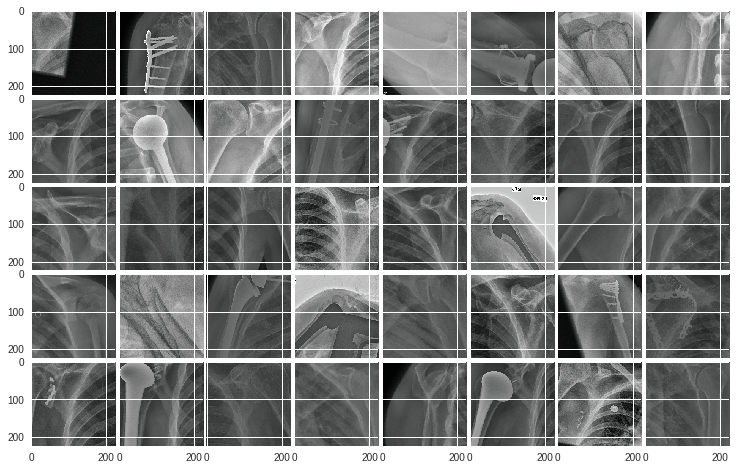

In [183]:
imgview, label,Id = next(iter(transformed_valid_dl))
#print(img, label.size())
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 8), axes_pad=0.05)  
for i in range(imgview.size()[0]):
  #print(img)
  ax = grid[i]
  print(imgview.shape)
  imshow(ax,imgview[i])
  print(label[i])
  print(Id[i])

In [184]:
def get_count(layer_name,model_name):
  ct  = 0 
  layer_count ={}
  for name, child in model_name.named_children():
      for name2, params in child.named_parameters():
        layer_count[name2] = ct
        ct +=1
  return layer_count[layer_name]

def freeze_till(layer_name,model_name):
  ct  = 0 
  count = get_count(layer_name,model_name)
  
  for name, child in model_name.named_children():
    for name2, params in child.named_parameters():
      
      if ct > count :
          
            params.requires_grad = True
      else :
            params.requires_grad = False
      ct +=1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}
print(dataset_sizes)

## This function evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.# phase - train or validation
            for inputs, labels,Id in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                InputId = Id.to(device)
                InputId = InputId.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    #print(outputs.shape)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                #print(phase,preds,labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            #print(preds[1:10],labels.data[1:10])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        #print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

{'train': 8379, 'val': 563}


In [185]:
# Load Pretrained model

#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)

# Freeze specific layers of the model

freeze_till('transition2.conv.weight',model_ft)

# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss(weight = torch.tensor([1, 1.05]).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [186]:
optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = 1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 0.5414 Acc: 0.7383
val Loss: 0.4703 Acc: 0.7904
Epoch 1/14
----------
train Loss: 0.4641 Acc: 0.7855
val Loss: 0.4582 Acc: 0.7940
Epoch 2/14
----------
train Loss: 0.4107 Acc: 0.8157
val Loss: 0.4756 Acc: 0.7940
Epoch 3/14
----------
train Loss: 0.3559 Acc: 0.8471
val Loss: 0.5245 Acc: 0.7744
Epoch 4/14
----------
train Loss: 0.3116 Acc: 0.8676
val Loss: 0.5764 Acc: 0.7638
Epoch 5/14
----------
train Loss: 0.2152 Acc: 0.9169
val Loss: 0.5137 Acc: 0.7957
Epoch 6/14
----------
train Loss: 0.1841 Acc: 0.9341
val Loss: 0.5616 Acc: 0.7833
Epoch 7/14
----------
train Loss: 0.1586 Acc: 0.9440
val Loss: 0.5977 Acc: 0.7798
Epoch 8/14
----------
train Loss: 0.1409 Acc: 0.9502
val Loss: 0.6055 Acc: 0.7762
Epoch 9/14
----------
train Loss: 0.1216 Acc: 0.9578
val Loss: 0.6324 Acc: 0.7851
Epoch 10/14
----------
train Loss: 0.1110 Acc: 0.9622
val Loss: 0.6124 Acc: 0.7780
Epoch 11/14
----------
train Loss: 0.1141 Acc: 0.9616
val Loss: 0.6342 Acc: 0.7673
Epoch 12/14
--

In [47]:
for inputs, labels,Id in dataloaders['val']:
  print(Id)

('XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS')
('XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_HUMERUS', 'XR_

In [0]:
'''model_res = models.resnet18(pretrained=True)
num_ftrs = model_res.fc.in_features # fc for resnet
model_res.fc = nn.Linear(num_ftrs, 2)
model_res = model_res.to(device)
criterion = nn.CrossEntropyLoss()'''

In [0]:
'''optimizer_res = optim.Adam(list(filter(lambda p: p.requires_grad, model_res.parameters())),betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_res, step_size=5, gamma=0.1)
model_res = train_model(model_res, criterion, optimizer_res, exp_lr_scheduler,
                       num_epochs=15)'''

Epoch 0/14
----------
train Loss: 0.7502 Acc: 0.6208
val Loss: 0.7189 Acc: 0.5150
Epoch 1/14
----------
train Loss: 0.6283 Acc: 0.6816
val Loss: 0.8881 Acc: 0.5814
Epoch 2/14
----------
train Loss: 0.5431 Acc: 0.7507
val Loss: 0.6111 Acc: 0.6844
Epoch 3/14
----------
train Loss: 0.5360 Acc: 0.7655
val Loss: 0.5783 Acc: 0.6910
Epoch 4/14
----------
train Loss: 0.5056 Acc: 0.7770
val Loss: 0.5298 Acc: 0.7309
Epoch 5/14
----------
train Loss: 0.4389 Acc: 0.8153
val Loss: 0.5596 Acc: 0.7409
Epoch 6/14
----------
train Loss: 0.4180 Acc: 0.8340
val Loss: 0.5204 Acc: 0.7508
Epoch 7/14
----------
train Loss: 0.3988 Acc: 0.8395
val Loss: 0.5102 Acc: 0.7475
Epoch 8/14
----------
train Loss: 0.3891 Acc: 0.8362
val Loss: 0.5419 Acc: 0.7542
Epoch 9/14
----------
train Loss: 0.3992 Acc: 0.8340
val Loss: 0.5423 Acc: 0.7409
Epoch 10/14
----------
train Loss: 0.3729 Acc: 0.8488
val Loss: 0.5053 Acc: 0.7475
Epoch 11/14
----------
train Loss: 0.3726 Acc: 0.8510
val Loss: 0.5505 Acc: 0.7409
Epoch 12/14
--

In [0]:
'''learning_rates = [1e-4, 1e-3, 1e-2]
for lr in learning_rates:
    #optimizer_ft = optim.SGD(model_ft.classifier.parameters(),lr, momentum=0.9)
    optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)'''

'learning_rates = [1e-4, 1e-3, 1e-2]\nfor lr in learning_rates:\n    #optimizer_ft = optim.SGD(model_ft.classifier.parameters(),lr, momentum=0.9)\n    optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)\n    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,\n                       num_epochs=3)'

In [0]:
!pip install torchsummary

In [0]:
from torchsummary import summary
summary(model_ft, (3, 224, 224))

In [0]:
summary(model_res, (3, 224, 224))

In [0]:
def softmax1(X, theta = 1.0, axis = None):
    """
    Compute the softmax of each element along an axis of X.
    Parameters
    ----------
    X: ND-Array. Probably should be floats. 
    theta (optional): float parameter, used as a multiplier
        prior to exponentiation. Default = 1.0
    axis (optional): axis to compute values along. Default is the 
        first non-singleton axis.
    Returns an array the same size as X. The result will sum to 1
    along the specified axis.
    """

    # make X at least 2d
    y = np.atleast_2d(X)

    # find axis
    if axis is None:
        axis = next(j[0] for j in enumerate(y.shape) if j[1] > 1)

    # multiply y against the theta parameter, 
    y = y * float(theta)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y, axis = axis), axis)
    
    # exponentiate y
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = axis), axis)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(X.shape) == 1: p = p.flatten()

    return p

In [0]:
model_ft.eval()
#model_res.eval()
pred_list_dense = []
label_list_dense = []
softmax_list = []
image_list_dense = []
pred_list_res = []
Id_list = []

ct12 = 0 
for inputs1, labels1, Id1 in dataloaders['val']:
                ct12 += 1
                inputs1 = inputs1.to(device)
                labels1 = labels1.to(device)
                labels1 = labels1.type(torch.cuda.LongTensor)
                Id1 = Id1.to(device)
                Id1 = Id1.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                # optimizer.zero_grad()
                # forward
                # track history if only in train
                # with torch.set_grad_enabled(phase == 'train'):
                outputs1 = model_ft(inputs1)
                  
                    #print(outputs.shape)
                _, preds1 = torch.max(outputs1, 1)
                pred_list_dense.extend(preds1.cpu().numpy())
                label_list_dense.extend(labels1.data)
                Id_list.extend(Id1.data)
                softmax_list.extend(softmax1(outputs1.cpu().detach().numpy(),axis =1))
                image_list_dense.extend(inputs1)
                #outputs2 = model_res(inputs1)
                  
                    #print(outputs.shape)
                #_, preds2 = torch.max(outputs2, 1)
                #pred_list_res.extend(preds2.cpu().numpy())
                

In [0]:
incorrect_list = [663,668,676,677,685,686,688,689,690,691,705,706,714,715,720,721,728,730,739,740,747,755,760,761,768,769,771,780,781,784,785,786,787,790,791,792,796,797,800,801,808,809,810]
#i.index if i isin(incorrect_list) for i in incorrect_list
index_list = []
for k in incorrect_list :
  for i, j in enumerate(Id_list) :
    if k == j :
      index_list.append(i)

In [0]:
Image_index_list = [image_list_dense[i] for i in index_list ]
Image_right_Index = []

In [0]:
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)
    

def viewimage(image_list):
    """ Function to view first 10 images from Dataset with Image and label.	"""
    ct = 0
    fig = plt.figure(1, figsize=(26, 44))
    grid = ImageGrid(fig, 111, nrows_ncols=(3, 4), axes_pad=0.05)
    for i in range(len(image_list)):
        #if diff[i] != 0 :
          
          img = image_list[i].cpu()
        
          
          #img2 = img.crop((100,0,280,512))
          #print(diff[i])
          ax = grid[ct]
          imshow(ax,img)
          ct += 1
          #ax.imshow(np.asarray(img))
          if ct == 8 :
            break

viewimage(Image_index_list)
  

In [0]:
outputs1

In [0]:
Compare_result = pd.DataFrame(np.column_stack([label_list_dense,pred_list_dense,softmax_list,Id_list]),columns=['Actual','DenseBlock','Softmax0','Softmax1','Id'])

In [171]:
Compare_result.to_csv("XR_ELBOW.csv")
Compare_result.shape

(465, 5)

In [0]:
from google.colab import files
files.download('XR_ELBOW.csv')

In [0]:

Actual_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               #transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

In [84]:
transformed_train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [91]:
len(transformed_valid_dataset)

301

In [109]:
incorrect_list

[663,
 668,
 676,
 677,
 685,
 686,
 688,
 689,
 690,
 691,
 705,
 706,
 714,
 715,
 720,
 721,
 728,
 730,
 739,
 740,
 747,
 755,
 760,
 761,
 768,
 769,
 771,
 780,
 781,
 784,
 785,
 786,
 787,
 790,
 791,
 792,
 796,
 797,
 800,
 801,
 808,
 809,
 810]

In [0]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)
    
def viewimage_dataset(Dataset,wrlist):
    """ Function to view first 10 images from Dataset with Image and label.	"""
    ct = 0
    fig = plt.figure(1, figsize=(16, 8))
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 8), axes_pad=0.05)
    for i in range(len(transformed_valid_dataset)):

        img, label,unId = Dataset[i]
        #print(unId)
        #print(wrlist)
        if unId in wrlist :
          
          ct += 1
          #img2 = img.crop((100,0,280,512))
          print(unId , ':' ,img.shape,':',label)
          ax = grid[ct]
          imshow(ax,img)
          if ct == 7 :
            break
            

663 : torch.Size([3, 406, 512]) : 1.0
668 : torch.Size([3, 512, 187]) : 1.0
676 : torch.Size([3, 420, 512]) : 1.0
677 : torch.Size([3, 512, 406]) : 1.0
685 : torch.Size([3, 424, 512]) : 1.0
686 : torch.Size([3, 308, 512]) : 1.0
688 : torch.Size([3, 512, 406]) : 1.0


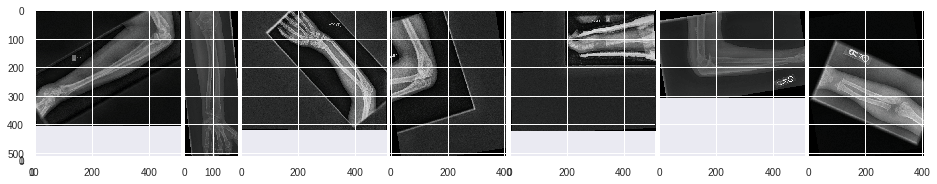

In [116]:
viewimage_dataset(Actual_valid_dataset,incorrect_list)

In [0]:
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)
    
def viewimage_dataset1(Dataset,wrlist):
    """ Function to view first 10 images from Dataset with Image and label.	"""
    ct = 0
    fig = plt.figure(1, figsize=(16, 8))
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 8), axes_pad=0.05)
    for i in range(len(transformed_valid_dataset)):

        img, label,unId = Dataset[i]
        #print(unId)
        #print(wrlist)
        if unId in [664,665,667,669,670,671,672,673,674,675,678,679,680,681,682,683] :
          
          ct += 1
          #img2 = img.crop((100,0,280,512))
          print(unId , ':' ,img.shape,':',label)
          ax = grid[ct]
          imshow(ax,img)
          if ct == 7 :
            break

664 : torch.Size([3, 420, 512]) : 1.0
665 : torch.Size([3, 512, 420]) : 1.0
667 : torch.Size([3, 512, 420]) : 1.0
669 : torch.Size([3, 186, 512]) : 1.0
670 : torch.Size([3, 512, 420]) : 1.0
671 : torch.Size([3, 512, 420]) : 1.0
672 : torch.Size([3, 512, 421]) : 1.0


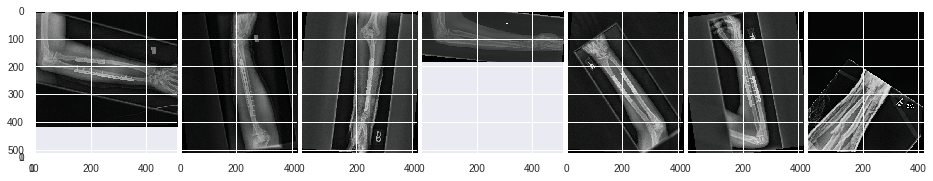

In [118]:
viewimage_dataset1(Actual_valid_dataset,incorrect_list)

In [0]:
from google.colab import files
files.download('Result_Compare1.csv')

In [58]:
!pip install pycm
from pycm import *

    100% |████████████████████████████████| 204kB 5.9MB/s 
    100% |████████████████████████████████| 184kB 7.6MB/s 
    100% |████████████████████████████████| 51kB 13.3MB/s 
    100% |████████████████████████████████| 204kB 6.4MB/s 
art 1.5 has requirement setuptools==39.2.0, but you'll have setuptools 39.1.0 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1


In [59]:
cm = ConfusionMatrix(actual_vector=result_df.Actual.values, predict_vector=result_df.DenseBlock.values)# Create CM From Data
cm.classes

NameError: ignored

In [0]:
result_df = pd.read_csv("Result_Compare1.csv")

In [0]:
result_df.head()

,Unnamed: 0,Actual,DenseBlock,ResNet
0,0,0,0,0
1,1,1,0,0
2,2,1,1,1
3,3,0,0,0
4,4,0,0,0


In [1]:
!ls

datalab  sample_data


In [0]:
print(cm)

Predict          0        1        
Actual
0                137      13       
1                55       96       




Overall Statistics : 

95% CI                                                           (0.72684,0.82133)
Bennett_S                                                        0.54817
Chi-Squared                                                      98.22043
Chi-Squared DF                                                   1
Conditional Entropy                                              0.68656
Cramer_V                                                         0.57124
Cross Entropy                                                    1.0584
Gwet_AC1                                                         0.5564
Joint Entropy                                                    1.68655
KL Divergence                                                    0.05841
Kappa                                                            0.54859
Kappa 95% CI                                        

In [0]:
!ls

datalab  __MACOSX  MURA-v1.1  MURA-v1.1.zip  Result_Compare.csv


In [0]:
Compare_result

,Actaul,DenseBlock,ResNet
0,1,0,1
1,1,1,1
2,1,0,1
3,0,0,0
4,0,1,0
5,0,0,0
6,1,1,1
7,0,1,1
8,1,1,1
9,0,1,1
